In [247]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from pandas.tseries.offsets import CustomBusinessDay

The magic formula ranks companies based on two factors: return on capital and earnings yield.

#### Return on Capital
$\textrm{ROC} = \textrm{EBIT}/\textrm{(Net Working Capital + Net Fixed Assets)}$

$\begin{split}
\textrm{Net Fixed Assets} & = \textrm{Total Assets} \\
 & - \textrm{Total Current Assets} \\
 & - \textrm{Total Intangibles & Goodwill}
\end{split}$

#### Earnings yield
$\textrm{Earnings Yield} = \textrm{EBIT} / \textrm{Enterprise Value}$

$\begin{split}
\textrm{Enterprise Value} & = \textrm{Market Value of Equity} \\
 & + \textrm{Net Interest-Bearing Debt}
\end{split}$

In [58]:
def org_columns(df):
    '''
    Organiza os dataframes, arruma nomes das colunas, remove linhas
    e colunas que possuam apenas NAs
    '''
    tickers = df.columns.str.extract('(.*)$')[0]
    df.columns = tickers
    df[df.index.str.contains("Jan|Feb|Apr|May|Jul|Aug|Oct|Nov")]=np.NaN
    df = df.fillna(method='ffill', limit=2)
    df.columns.name = "ticker"
    return df

In [132]:
# Volume Mensal (in thousands) - vm
vm_ati = pd.read_excel('../../data/economatica_1/volume_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
vm_can = pd.read_excel('../../data/economatica_1/volume_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
vm_ati.drop(["Jan-86", "Feb-86"], inplace=True)
vm_can.drop(["Jan-86", "Feb-86"], inplace=True)
vm = pd.concat([vm_ati,vm_can],axis=1,sort=False)
vm.columns = vm.columns.str.extract('(.*)$')[0]
vm.columns.name = "ticker"
vm.drop(["Oct-19"], inplace=True)

In [60]:
# EBIT
ebit_ati = pd.read_excel('../../data/economatica_1/ebit_mensal__ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ebit_can = pd.read_excel('../../data/economatica_1/ebit_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ebit_can.drop(["Jan-86", "Feb-86"], inplace=True)
ebit = pd.concat([ebit_ati,ebit_can],axis=1,sort=False)
ebit = org_columns(ebit)

In [61]:
# Net Working Capital - nwc
nwc_ati = pd.read_excel('../../data/economatica_1/working_capital_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
nwc_can = pd.read_excel('../../data/economatica_1/working_capital_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
nwc_can.drop(["Jan-86", "Feb-86"], inplace=True)
nwc = pd.concat([ebit_ati,ebit_can],axis=1,sort=False)
nwc = org_columns(nwc)

In [62]:
# Total Assets - ta
ta_ati = pd.read_excel('../../data/economatica_1/total_assets_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ta_can = pd.read_excel('../../data/economatica_1/total_assets_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ta_can.drop(["Jan-86", "Feb-86"], inplace=True)
ta = pd.concat([ta_ati,ta_can],axis=1,sort=False)
ta = org_columns(ta)

In [72]:
# Ativo Circulante - ac
ac_ati = pd.read_excel('../../data/economatica_1/ativo_circulante_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ac_can = pd.read_excel('../../data/economatica_1/ativo_circulante_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ac_can.drop(["Jan-86", "Feb-86"], inplace=True)
ac = pd.concat([ac_ati,ac_can],axis=1,sort=False)
ac = org_columns(ac)

In [74]:
# Passivo Circulante - pc
pc_ati = pd.read_excel('../../data/economatica_1/passivo_circulante_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
pc_can = pd.read_excel('../../data/economatica_1/passivo_circulante_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
pc_can.drop(["Jan-86", "Feb-86"], inplace=True)
pc = pd.concat([pc_ati,pc_can],axis=1,sort=False)
pc = org_columns(pc)

In [76]:
# Total Current Assets
# tca = ac - pc
tca = ac.sub(pc,fill_value=0)

In [82]:
# Goodwill - gw
gw_ati = pd.read_excel('../../data/economatica_1/goodwill_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
gw_can = pd.read_excel('../../data/economatica_1/goodwill_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
gw_ati.drop(["Jan-86", "Feb-86"], inplace=True)
gw = pd.concat([gw_ati,gw_can],axis=1,sort=False)
gw = org_columns(gw)

In [86]:
# Net Fixed Assets - nfa
# nfa = ta - tca - gw
nfa = ta.sub(tca, fill_value=0).sub(gw, fill_value=0).sub(tca, fill_value=0)

In [117]:
# Market Value of Equity - mve
# mve tem 404 rows enquanto normalmente as outras tem 4003, o que causa problema na hora de somar, para ver qual a diferença
# mve.index.difference(nibd.index)
# mve tem outubro de 2019 a mais
mve_ati = pd.read_excel('../../data/economatica_1/valor_mercado_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
mve_can = pd.read_excel('../../data/economatica_1/valor_mercado_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
mve_can.drop(["Jan-86", "Feb-86"], inplace=True)
mve = pd.concat([mve_ati,mve_can],axis=1,sort=False)
mve.drop(["Oct-19"], inplace=True)
mve = org_columns(mve)

In [118]:
# Net Interest-Bearing Debt - nibd
nibd_ati = pd.read_excel('../../data/economatica_1/net_debt_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
nibd_can = pd.read_excel('../../data/economatica_1/net_debt_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
nibd_can.drop(["Jan-86", "Feb-86"], inplace=True)

nibd = pd.concat([nibd_ati,nibd_can],axis=1,sort=False)
nibd = org_columns(nibd)

In [119]:
# Enterprise Level - ev
# ev = mve + nibd
ev = mve.add(nibd, fill_value=0)

In [121]:
# Return on Capital (ROC)
# roc = ebit / (nwc + nfa)
roc = ebit.div(nwc.add(nfa,fill_value=0),fill_value=0)

In [123]:
# Earnings Yield
ey = ebit.div(ev, fill_value=0)

In [18]:
# PARTE 2
# Abrir preços diário e transformar em fim de mes

In [125]:
def infer_calendar(dates):
    """
    Infer a calendar as pandas DateOffset from a list of dates.
    Parameters
    ----------
    dates : array-like (1-dimensional) or pd.DatetimeIndex
        The dates you want to build a calendar from
    Returns
    -------
    calendar : pd.DateOffset (CustomBusinessDay)
    """
    dates = pd.DatetimeIndex(dates)

    traded_weekdays = []
    holidays = []

    days_of_the_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    for day, day_str in enumerate(days_of_the_week):

        weekday_mask = (dates.dayofweek == day)

        # keep only days of the week that are present
        if not weekday_mask.any():
            continue
        traded_weekdays.append(day_str)

        # look for holidays
        used_weekdays = dates[weekday_mask].normalize()
        all_weekdays = pd.date_range(dates.min(), dates.max(),
                                     freq=CustomBusinessDay(weekmask=day_str)
                                     ).normalize()
        _holidays = all_weekdays.difference(used_weekdays)
        _holidays = [timestamp.date() for timestamp in _holidays]
        holidays.extend(_holidays)

    traded_weekdays = ' '.join(traded_weekdays)
    return CustomBusinessDay(weekmask=traded_weekdays, holidays=holidays)

In [126]:
# Carrega Closing Price Diário - cpd
cpd_ati = pd.read_excel('../../data/economatica_1/fechamento_diario_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
cpd_can = pd.read_excel('../../data/economatica_1/fechamento_diario_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
cpd = pd.concat([cpd_ati,cpd_can],axis=1,sort=False)
cpd.columns = cpd.columns.str.extract('(.*)$')[0]
cpd.columns.name = "ticker"
cpd.dropna(how='all',inplace=True) # cpd possui muitas linhas com NaN
cpd.dropna(axis=1, how='all',inplace=True) # cpd possui muitas colunas com NaN

In [127]:
# Calcula Closing Price Mensal - cpm e em percentual cpm_pct
dates = cpd.index
calendar = infer_calendar(dates)
cme_cal = pd.offsets.CustomBusinessMonthEnd(calendar = calendar.calendar)
idm = pd.date_range(dates[0], dates[-1], freq=cme_cal)
cpm = cpd.loc[idm]
cpm.drop([cpm.index[0],cpm.index[1]], inplace=True)
# cpm.drop[0] # não tem como dar drop estilo iloc
cpm_pct = cpm.pct_change()

In [20]:
# Agora já temos todas variáveis de interesse:
# 1) ROC - roc
# 2) EY - ey
# 3) Volume Mensal - vm
# 4) Preço Fechamento Mensal - cpm

In [21]:
# Sobre o processo
# - Elimina financeiras
# Todo fim de mês:
# 	- Elimina ações com volume mensal menor que 2 milhões
# 	- Calcula ROIC e EY
# 	- Rankeia, exclui negativos e soma os ranks de acordo com Magic Formula
# 	- Escolhe 5 ações com melhor rankeamento

In [263]:
l = len(cpm)
# start money
sm = 1
portfolio = pd.Series([])
pf_idx = pd.Index([])
rets = pd.Series(np.zeros(l), index=cpm.index)
for i in range(0,l):
    if len(pf_idx)==5:
        portfolio = cpm_pct.iloc[i][pf_idx]
        rets[i] = portfolio.sum()/5
    vm_2000 = vm.iloc[i]
    vm_2000 = vm_2000[vm_2000>2000]
    idx = vm_2000.index
    roc_2000 = roc.iloc[i][idx]
    ey_2000 = ey.iloc[i][idx]
    roc_rank = roc_2000.sort_values(ascending=False).rank(ascending=False)
    ey_rank = ey_2000.sort_values(ascending=False).rank(ascending=False)
    winners = (ey_rank + roc_rank).sort_values(ascending=True)
    pf_idx = winners.head(5).index

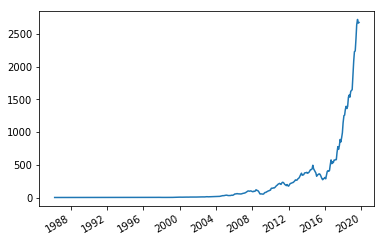

In [258]:
final = 1*(1+rets).cumprod()
final.plot()
plt.show()

In [282]:
# Cálculo CAGR (Compound Anual Growth Rate)
tot_gain = (final[-1]-final[0])/final[0]
mon_gain = (1+tot_gain)**(1/l)-1
cagr = (1+mon_gain)**12-1
cagr

0.26491799010654016

8

In [274]:
tot_gain

2675.6683842275847